# clutering email

### Load Data

In [2]:
import pandas as pd

# 1. Muat data Anda (Contoh untuk spam.csv)
# Sesuaikan 'header=96' jika perlu
df = pd.read_csv('spam.csv',encoding='latin-1')

# 2. <-- TAMBAHKAN BARIS INI
#    Ini akan menghapus semua baris dimana kolom 'Text' adalah NaN
df = df.dropna(subset=['Text'])

# 3. Sekarang Anda bisa melanjutkan dengan aman
#    Misalnya, mengambil kolom yang Anda perlukan
df = df[['Text']]

# ...lanjutkan ke kode preprocessing Anda...
# df['cleaned_text'] = df['Text'].apply(preprocess_text)
# ...dst

In [3]:
# Display basic information about the dataset
print("Dataset shape:", df.shape)
df

Dataset shape: (5572, 1)


,Text
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [4]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    5572 non-null   object
dtypes: object(1)
memory usage: 43.7+ KB


In [5]:
# Tampilkan data "text"
df['Text']

,Text
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


### Preprocesing

In [6]:
# Hapus baris dengan Missing Value di 'text'
df.dropna(subset=['Text'], inplace=True)

# Hapus data duplikat
df.drop_duplicates(inplace=True)

In [7]:
import re

# Fungsi untuk membersihkan teks
def clean_text(text):
    text = text.lower() # Ubah ke huruf kecil
    text = re.sub(r'[^\w\s]', '', text) # Hapus tanda baca
    text = re.sub(r'\d+', '', text) # Hapus nomor
    return text

# Terapkan pembersihan ke kolom 'isi'
df['cleaned_Text'] = df['Text'].apply(clean_text)

# Tampilkan DataFrame
display(df[['Text', 'cleaned_Text']].head())

,Text,cleaned_Text
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [8]:
import sys

# Perintah untuk menginstal library menggunakan path Python yang sedang aktif
!{sys.executable} -m pip install nltk

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from IPython.display import display

# Download paket 'punkt' (jika belum)
nltk.download('punkt')

# --- INI ADALAH PERBAIKANNYA ---
# Download paket 'punkt_tab' yang hilang
nltk.download('punkt_tab')

# Fungsi untuk melakukan tokenisasi
def tokenize_text(text):
    return word_tokenize(text)

# Terapkan tokenisasi ke kolom 'cleaned_Text'
# (Pastikan sel yang memuat 'df' dan 'cleaned_Text' sudah dijalankan)
df['tokenized_Text'] = df['cleaned_Text'].apply(tokenize_text)

# Tampilkan DataFrame dengan kolom hasil tokenisasi
print("Tokenisasi berhasil!")
display(df[['cleaned_Text', 'tokenized_Text']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Tokenisasi berhasil!


,cleaned_Text,tokenized_Text
0,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,free entry in a wkly comp to win fa cup final...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [13]:
import nltk
from nltk.corpus import stopwords
from IPython.display import display

# Download paket stopwords (jika belum)
nltk.download('stopwords')

# --- INI PERBAIKANNYA ---
# Dapatkan Stop Word bahasa INGGRIS, bukan Indonesia
list_stopwords_english = set(stopwords.words('english'))

# Fungsi untuk menghapus stop words
def remove_stopwords(tokens):
    return [word for word in tokens if word not in list_stopwords_english]

# --- INI PERBAIKAN NAMA KOLOM ---
# Terapkan penghapusan Stop Word ke kolom 'tokenized_Text'
# (Pastikan sel yang memuat 'df' dan 'tokenized_Text' sudah ada)
df['stopwords_removed_Text'] = df['tokenized_Text'].apply(remove_stopwords)

# Tampilkan DataFrame
print("Stopword removal berhasil!")
display(df[['tokenized_Text', 'stopwords_removed_Text']].head())

Stopword removal berhasil!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tokenized_Text,stopwords_removed_Text
0,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


In [15]:
import pandas as pd
from collections import Counter
from IPython.display import display

# (Pastikan df sudah berisi kolom 'Text' dan 'stopwords_removed_Text')

# --- Bagian 1: Hitung Frekuensi Kata (Tambahan) ---
# Kita perlu menghitung frekuensi dari hasil stopword removal

# Gabungkan semua token dari 'stopwords_removed_Text' menjadi satu daftar
all_spam_words = [word for tokens in df['stopwords_removed_Text'] for word in tokens]

# Hitung frekuensi setiap kata
spam_word_frequencies = Counter(all_spam_words)
print("Perhitungan frekuensi kata untuk data spam selesai.")


# --- Bagian 2: Adaptasi Kode Penyimpanan Anda ---

# Buat DataFrame baru dengan isi asli dan hasil preprocessing
# (Kolom 'kategori' dihilangkan karena tidak ada di df spam)
processed_df = df[['Text', 'stopwords_removed_Text']].copy()

# Ganti nama kolom
processed_df.rename(columns={'stopwords_removed_Text': 'hasil_preprocessing'}, inplace=True)

# Konversi frekuensi kata (dari variabel baru) ke DataFrame
frequency_df = pd.DataFrame.from_dict(spam_word_frequencies, orient='index', columns=['frequency'])
frequency_df.index.name = 'word'
frequency_df.sort_values(by='frequency', ascending=False, inplace=True)

# Simpan ke dua file CSV terpisah (dengan nama baru)
processed_df.to_csv('hasil_preprocessing_spam.csv', index=False, encoding='utf-8')
frequency_df.to_csv('frek_kata_spam.csv', encoding='utf-8')

print("\nFile berhasil disimpan!")
print("Hasil preprocessing disimpan di 'hasil_preprocessing_spam.csv'")
print("Frekuensi kata disimpan di 'frek_kata_spam.csv'")

# Tampilkan contoh hasilnya
print("\nContoh hasil preprocessing spam:")
display(processed_df.head())

Perhitungan frekuensi kata untuk data spam selesai.

File berhasil disimpan!
Hasil preprocessing disimpan di 'hasil_preprocessing_spam.csv'
Frekuensi kata disimpan di 'frek_kata_spam.csv'

Contoh hasil preprocessing spam:


,Text,hasil_preprocessing
0,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t..."


### clutering

In [16]:
import pandas as pd
import ast # Untuk mengubah string-list menjadi list
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# -------------------------------------------------------------------
# LANGKAH 1: MEMUAT DATA YANG SUDAH DI-PREPROCESSING
# -------------------------------------------------------------------

try:
    df = pd.read_csv('hasil_preprocessing_spam.csv')
    print(f"Data 'hasil_preprocessing_spam.csv' berhasil dimuat. Jumlah data: {len(df)}")

except FileNotFoundError:
    print("File 'hasil_preprocessing_spam.csv' tidak ditemukan.")
    # Data dummy jika file gagal dimuat
    df = pd.DataFrame({
        'Text': ["Free entry 2 win FA Cup", "Ok lar... Joking wif u oni...", "WINNER!! Claim prize now!", "I'm gonna be home soon"],
        'hasil_preprocessing': ["['free', 'entry', 'win', 'fa', 'cup']", "['ok', 'lar', 'joking', 'wif', 'u', 'oni']", "['winner', 'claim', 'prize']", "['im', 'gonna', 'home', 'soon']"]
    })

# -------------------------------------------------------------------
# LANGKAH 2: PERSIAPAN DATA UNTUK VEKTORISASI
# -------------------------------------------------------------------

# 1. Mengatasi data kosong (jika ada)
#    (NaN di kolom hasil_preprocessing akan diisi string list kosong '[]')
df['hasil_preprocessing'] = df['hasil_preprocessing'].fillna('[]')

# 2. Mengubah string-list menjadi list sungguhan
#    Contoh: "['win', 'free']" -> ['win', 'free']
try:
    df['tokens'] = df['hasil_preprocessing'].apply(ast.literal_eval)
except Exception as e:
    print(f"Error saat konversi string ke list: {e}")

# 3. Menggabungkan kembali token menjadi satu string (kalimat)
#    Contoh: ['win', 'free'] -> "win free"
#    Ini diperlukan agar TfidfVectorizer bisa bekerja
df['text_joined'] = df['tokens'].apply(lambda x: ' '.join(x))

print("Data siap untuk vektorisasi.")

# -------------------------------------------------------------------
# LANGKAH 3: VEKTORISASI (EKSTRAKSI FITUR) DENGAN TF-IDF
# -------------------------------------------------------------------
# Perhatikan: kita tidak perlu lagi 'stop_words='english'
# karena stopword sudah dibuang.

vectorizer = TfidfVectorizer(
    max_df=0.8,           # Abaikan kata yg muncul > 80% dokumen
    min_df=5,             # Abaikan kata yg muncul < 5 kali
    lowercase=False       # Teks sudah lowercase, tapi ini tidak masalah
)

X = vectorizer.fit_transform(df['text_joined'])

print(f"Vektorisasi selesai. Bentuk matriks TF-IDF: {X.shape}")

# -------------------------------------------------------------------
# LANGKAH 4: CLUSTERING DENGAN K-MEANS
# -------------------------------------------------------------------
# Kita tetap asumsikan ada 2 cluster (spam dan ham)
k = 2

kmeans_model = KMeans(
    n_clusters=k,
    random_state=42,
    n_init=10
)

# Latih model pada data TF-IDF
kmeans_model.fit(X)

# Tambahkan label cluster ke DataFrame
df['cluster'] = kmeans_model.labels_

print("Proses clustering K-Means selesai.")

# -------------------------------------------------------------------
# LANGKAH 5: ANALISIS HASIL
# -------------------------------------------------------------------

# 1. Lihat kata-kata kunci (top terms) per cluster
print("\n--- Kata Kunci Teratas per Cluster ---")

terms = vectorizer.get_feature_names_out()
order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]

for i in range(k):
    print(f"\nCluster {i}:")
    top_10_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(" ".join(top_10_terms))

# 2. Tampilkan beberapa contoh email (dari teks ASLI) per cluster
print("\n--- Contoh Email per Cluster (dari Teks Asli) ---")

for i in range(k):
    print(f"\n======== CONTOH CLUSTER {i} ========")
    # Kita ambil dari kolom 'Text' (teks asli) agar mudah dibaca
    cluster_samples = df[df['cluster'] == i]['Text'].sample(3, random_state=1, replace=True).tolist()
    for sample in cluster_samples:
        print(f"> {sample}\n")

Data 'hasil_preprocessing_spam.csv' berhasil dimuat. Jumlah data: 5169
Data siap untuk vektorisasi.
Vektorisasi selesai. Bentuk matriks TF-IDF: (5169, 1445)
Proses clustering K-Means selesai.

--- Kata Kunci Teratas per Cluster ---

Cluster 0:
im call ok got ltgt come ur dont know like

Cluster 1:
get text free ill call reply im stop back mobile

--- Contoh Email per Cluster (dari Teks Asli) ---

======== CONTOH CLUSTER 0 ========
> Mmm so yummy babe ... Nice jolt to the suzy

> This message is from a great Doctor in India:-): 1) Do not drink APPY FIZZ. It contains Cancer causing age

> I just got home babe, are you still awake ?


======== CONTOH CLUSTER 1 ========
> Loan for any purpose å£500 - å£75,000. Homeowners + Tenants welcome. Have you been previously refused? We can still help. Call Free 0800 1956669 or text back 'help'

> *deep sigh* ... I miss you :-( ... I am really surprised you haven't gone to the net cafe yet to get to me ... Don't you miss me?

> Do you want a New Noki

Memulai proses t-SNE untuk reduksi dimensi...
(Ini mungkin perlu waktu 1-2 menit, harap tunggu...)


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Proses t-SNE selesai.


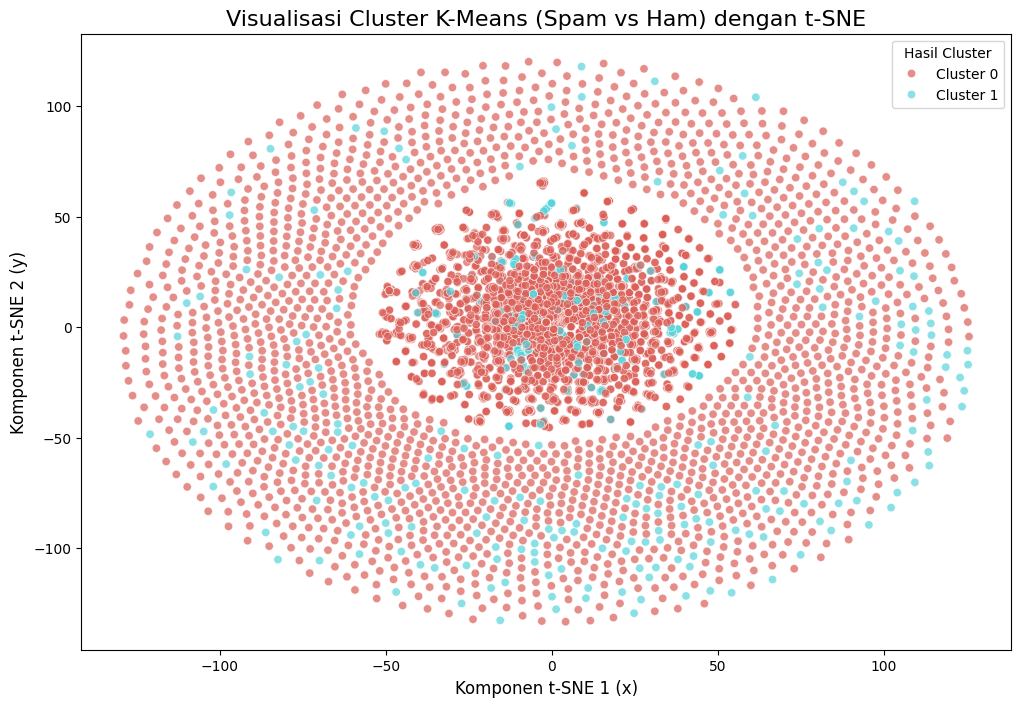

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# (Pastikan Anda sudah memiliki matriks 'X' dan 'df' dengan kolom 'cluster'
#  dari kode K-Means sebelumnya)

print("Memulai proses t-SNE untuk reduksi dimensi...")
print("(Ini mungkin perlu waktu 1-2 menit, harap tunggu...)")

# 1. Konfigurasi t-SNE
#    n_components=2 -> kita ingin mereduksi jadi 2 dimensi (x, y)
#    random_state=42 -> agar hasilnya konsisten
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)

# 2. Terapkan t-SNE pada matriks TF-IDF (X)
#    (Kita ubah dulu X dari sparse matrix ke array biasa)
tsne_results = tsne.fit_transform(X.toarray())

print("Proses t-SNE selesai.")

# 3. Masukkan hasil 2D (x, y) ke DataFrame
df['tsne_x'] = tsne_results[:, 0]
df['tsne_y'] = tsne_results[:, 1]

# 4. Buat label yang lebih deskriptif untuk legend
df['Cluster Label'] = df['cluster'].map({0: 'Cluster 0', 1: 'Cluster 1'})

# 5. Plot menggunakan Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='tsne_x',
    y='tsne_y',
    hue='Cluster Label',  # Beri warna berdasarkan cluster
    palette=sns.color_palette("hls", 2), # Palet warna
    data=df,
    legend="full",
    alpha=0.7 # Transparansi titik
)

plt.title('Visualisasi Cluster K-Means (Spam vs Ham) dengan t-SNE', fontsize=16)
plt.xlabel('Komponen t-SNE 1 (x)', fontsize=12)
plt.ylabel('Komponen t-SNE 2 (y)', fontsize=12)
plt.legend(title='Hasil Cluster')
plt.show()